In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

In [3]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'

In [4]:
d = pd.read_csv('../tables/merged_final_non_org.csv', parse_dates=['Time_Mid'])

In [5]:
d['k_diff'] = d['k_obs'] - d['k']
d['k_%diff'] = (d['k_obs'] - d['k'])/d['k_obs']

In [6]:
data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/2292447440.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/2292447440.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/2292447440.py:32: SettingWithCopyWarning: 
A value is trying to be set on a c

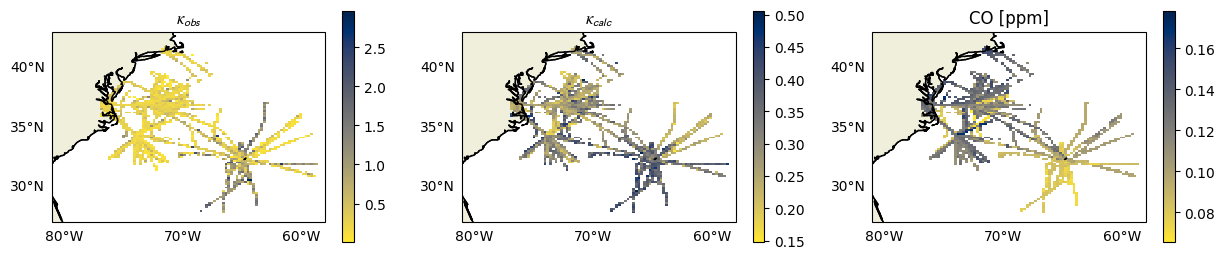

In [7]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''




# Set up the map projection and plot area
fig, axes = plt.subplots(1,3, figsize=(15,3), subplot_kw={'projection': ccrs.PlateCarree()})

plt_key = ['k_obs', 'k', 'CO_ppm']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$', r'$\kappa _{\mathsf{calc}}$', 'CO [ppm]']

for i in range(0,3):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

    gl.xlines = False
    gl.ylines = False

# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

# Show the plot
plt.savefig('../figures/k_obs_map3.png', dpi=1000)


/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/2114075057.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/2114075057.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/2114075057.py:31: SettingWithCopyWarning: 
A value is trying to be set on a c

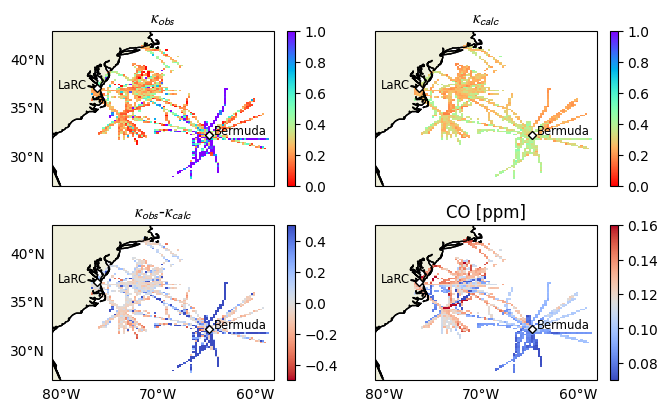

In [8]:
# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''



# Set up the map projection and plot area
fig, axes = plt.subplots(2,2, figsize=(6.5,4), subplot_kw={'projection': ccrs.PlateCarree()}, sharex='all', sharey='all', constrained_layout=True)

plt_key = ['k_obs', 'k']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$', r'$\kappa _{\mathsf{calc}}$']

for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[0,i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='rainbow_r', transform=ccrs.PlateCarree(), vmin=0, vmax=1)
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')


plt_key = ['k_diff', 'CO_ppm']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$-$\kappa _{\mathsf{calc}}$', 'CO [ppm]']
vmax_l = [.5, 0.16]
vmin_l = [-.5, 0.07]
cmap_l = ['coolwarm_r','coolwarm']
for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[1,i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap=cmap_l[i], transform=ccrs.PlateCarree(), vmax=vmax_l[i], vmin=vmin_l[i])
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')

# Coordinates for Bermuda and NASA Langley
bermuda_coords = (32.3078, -64.7505)  # Latitude, Longitude of Bermuda
langley_coords = (37.0862, -76.3809)    # Latitude, Longitude of NASA Langley

# Adding the labels to each axis
for ax in axes.flat:
    # Add label for Bermuda
    ax.plot(bermuda_coords[1], bermuda_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(bermuda_coords[1] + 0.5, bermuda_coords[0], 'Bermuda', color='black', transform=ccrs.PlateCarree(), fontsize='small')

    # Add label for NASA Langley
    ax.plot(langley_coords[1], langley_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(langley_coords[1] + -4, langley_coords[0], 'LaRC', color='black', transform=ccrs.PlateCarree(), fontsize='small')


# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')
#plt.tight_layout()
# Show the plot
# Add panel labels

plt.savefig('../figures/k_obs_map.png', dpi=1000)

In [9]:
axes

array([[<GeoAxes: title={'center': '$\\kappa _{\\mathsf{obs}}$'}>,
        <GeoAxes: title={'center': '$\\kappa _{\\mathsf{calc}}$'}>],
       [<GeoAxes: title={'center': '$\\kappa _{\\mathsf{obs}}$-$\\kappa _{\\mathsf{calc}}$'}>,
        <GeoAxes: title={'center': 'CO [ppm]'}>]], dtype=object)

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/52942144.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/52942144.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_3914/52942144.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of

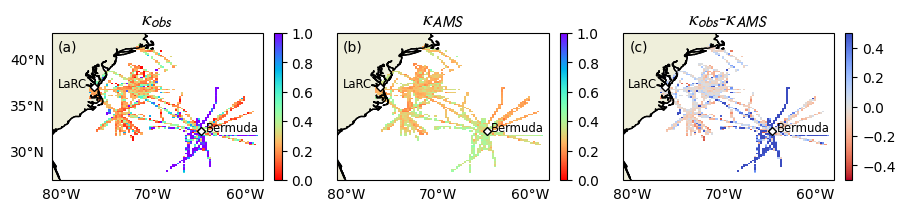

In [12]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''



# Set up the map projection and plot area
fig, axes = plt.subplots(1,3, figsize=(9,2), subplot_kw={'projection': ccrs.PlateCarree()}, sharex='all', sharey='all', constrained_layout=True)

plt_key = ['k_obs', 'k']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$', r'$\kappa _{\mathsf{AMS}}$']

for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='rainbow_r', transform=ccrs.PlateCarree(), vmin=0, vmax=1)
    ax.set_title(cmap_labels[i], fontsize=15)
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')


plt_key = ['k_diff', 'CO_ppm']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$-$\kappa _{\mathsf{AMS}}$', 'CO [ppm]']
vmax_l = [.5, 0.16]
vmin_l = [-.5, 0.07]
cmap_l = ['coolwarm_r','coolwarm']
for i in range(0,1):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[2]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap=cmap_l[i], transform=ccrs.PlateCarree(), vmax=vmax_l[i], vmin=vmin_l[i])
    ax.set_title(cmap_labels[i], fontsize=15)
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')

# Coordinates for Bermuda and NASA Langley
bermuda_coords = (32.3078, -64.7505)  # Latitude, Longitude of Bermuda
langley_coords = (37.0862, -76.3809)    # Latitude, Longitude of NASA Langley

# Adding the labels to each axis
for ax in axes.flat:
    # Add label for Bermuda
    ax.plot(bermuda_coords[1], bermuda_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(bermuda_coords[1] + 0.5, bermuda_coords[0], 'Bermuda', color='black', transform=ccrs.PlateCarree(), fontsize='small')

    # Add label for NASA Langley
    ax.plot(langley_coords[1], langley_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(langley_coords[1] + -4, langley_coords[0], 'LaRC', color='black', transform=ccrs.PlateCarree(), fontsize='small')


# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')
#plt.tight_layout()
# Show the plot
panel_labels = ['(a)', '(b)', '(c)']
for ax, label in zip(axes.flat, panel_labels):
    ax.text(0.12, .95, label, transform=ax.transAxes, va='top', ha='right')


plt.savefig('../figures/k_obs_map3.png', dpi=1000)

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_22854/2516817667.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_22854/2516817667.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_22854/2516817667.py:31: SettingWithCopyWarning: 
A value is trying to be set on 

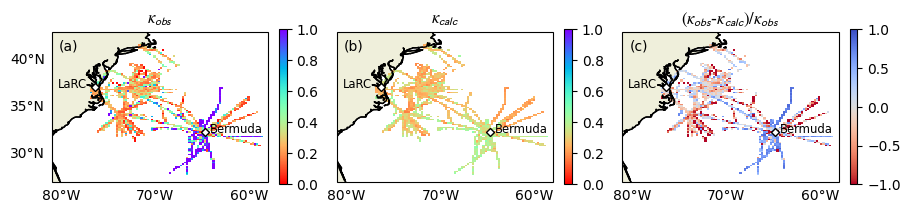

In [20]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''



# Set up the map projection and plot area
fig, axes = plt.subplots(1,3, figsize=(9,2), subplot_kw={'projection': ccrs.PlateCarree()}, sharex='all', sharey='all', constrained_layout=True)

plt_key = ['k_obs', 'k']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$', r'$\kappa _{\mathsf{calc}}$']

for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='rainbow_r', transform=ccrs.PlateCarree(), vmin=0, vmax=1)
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')


plt_key = ['k_%diff', 'CO_ppm']
cmap_labels = [r'$(\kappa _{\mathsf{obs}}$-$\kappa _{\mathsf{calc}})/\kappa _{\mathsf{obs}}$', 'CO [ppm]']
vmax_l = [1, 0.16]
vmin_l = [-1, 0.07]
cmap_l = ['coolwarm_r','coolwarm']
for i in range(0,1):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[2]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap=cmap_l[i], transform=ccrs.PlateCarree(), vmax=vmax_l[i], vmin=vmin_l[i])
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')

# Coordinates for Bermuda and NASA Langley
bermuda_coords = (32.3078, -64.7505)  # Latitude, Longitude of Bermuda
langley_coords = (37.0862, -76.3809)    # Latitude, Longitude of NASA Langley

# Adding the labels to each axis
for ax in axes.flat:
    # Add label for Bermuda
    ax.plot(bermuda_coords[1], bermuda_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(bermuda_coords[1] + 0.5, bermuda_coords[0], 'Bermuda', color='black', transform=ccrs.PlateCarree(), fontsize='small')

    # Add label for NASA Langley
    ax.plot(langley_coords[1], langley_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(langley_coords[1] + -4, langley_coords[0], 'LaRC', color='black', transform=ccrs.PlateCarree(), fontsize='small')


# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')
#plt.tight_layout()
# Show the plot
panel_labels = ['(a)', '(b)', '(c)']
for ax, label in zip(axes.flat, panel_labels):
    ax.text(0.12, .95, label, transform=ax.transAxes, va='top', ha='right')


plt.savefig('../figures/k_obs_map_percent.png', dpi=1000)

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/3523998978.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/3523998978.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)


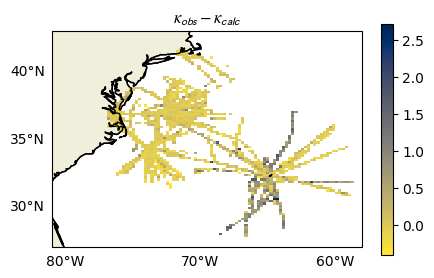

In [11]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''




# Set up the map projection and plot area
fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

plt_key = ['k_diff', 'k', 'CO_ppm']
cmap_labels = [r'$\kappa _{\mathsf{obs}} - \kappa _{\mathsf{calc}}$', r'$\kappa _{\mathsf{calc}}$', 'CO [ppm]']

i=0
data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

# Define the grid resolution
lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

# Bin the data into the grid
data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

# Calculate the mean time for each grid cell
grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
#grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

# Create a 2D array of the grid
time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


#ax=axes[i]
ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, edgecolor='black')
#ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

# Plot the heatmap
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
ax.set_title(cmap_labels[i])
# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
#cbar.set_label(cmap_labels[i])

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

gl.xlines = False
gl.ylines = False

# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

# Show the plot
plt.savefig('../figures/k_obs_map_diff.png', dpi=1000)

In [12]:
list(d.keys())

['Unnamed: 0.1',
 'level_0',
 'Unnamed: 0',
 'index',
 'Time_Mid',
 'SMPS_Bin02',
 'SMPS_Bin03',
 'SMPS_Bin04',
 'SMPS_Bin05',
 'SMPS_Bin06',
 'SMPS_Bin07',
 'SMPS_Bin08',
 'SMPS_Bin09',
 'SMPS_Bin10',
 'SMPS_Bin11',
 'SMPS_Bin12',
 'SMPS_Bin13',
 'SMPS_Bin14',
 'SMPS_Bin15',
 'SMPS_Bin16',
 'SMPS_Bin17',
 'SMPS_Bin18',
 'SMPS_Bin19',
 'SMPS_Bin20',
 'SMPS_Bin21',
 'SMPS_Bin22',
 'SMPS_Bin23',
 'SMPS_Bin24',
 'SMPS_Bin25',
 'SMPS_Bin26',
 'SMPS_Bin27',
 'SMPS_Bin28',
 'SMPS_Bin29',
 'SMPS_Bin30',
 'leg',
 'Org_Ave_IsoK_STP',
 'SO4_Ave_IsoK_STP',
 'NO3_Ave_IsoK_STP',
 'NH4_Ave_IsoK_STP',
 'Chl_Ave_IsoK_STP',
 'mz42_Ave_IsoK_STP',
 'mz43_Ave_IsoK_STP',
 'mz44_Ave_IsoK_STP',
 'mz55_Ave_IsoK_STP',
 'mz57_Ave_IsoK_STP',
 'mz58_Ave_IsoK_STP',
 'mz60_Ave_IsoK_STP',
 'mz79_Ave_IsoK_STP',
 'mz91_Ave_IsoK_STP',
 'CCN_SS',
 'N_CCN_stdPT',
 'LAS_Bin01',
 'LAS_Bin02',
 'LAS_Bin03',
 'LAS_Bin04',
 'LAS_Bin05',
 'LAS_Bin06',
 'LAS_Bin07',
 'LAS_Bin08',
 'LAS_Bin09',
 'LAS_Bin10',
 'LAS_Bin11',
 'LAS_

In [13]:
d['OMF'] = d['Org_Ave_IsoK_STP']/d['ams_tot']

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/167255689.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/167255689.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)


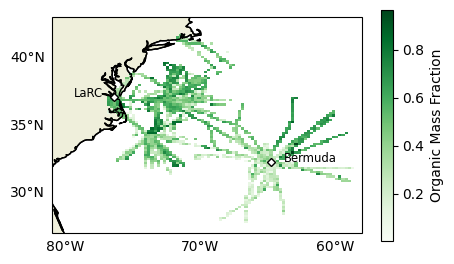

In [14]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''




# Set up the map projection and plot area
fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

plt_key = ['OMF', 'k', 'CO_ppm']
cmap_labels = ['Organic Mass Fraction', r'$\kappa _{calc}$', 'CO [ppm]']

i=0
data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

# Define the grid resolution
lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

# Bin the data into the grid
data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

# Calculate the mean time for each grid cell
grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
#grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

# Create a 2D array of the grid
time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


#ax=axes[i]
ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, edgecolor='black')
#ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

# Plot the heatmap
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='Greens', transform=ccrs.PlateCarree())
#ax.set_title(cmap_labels[i])
# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
cbar.set_label(cmap_labels[i])

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

gl.xlines = False
gl.ylines = False


ax.plot(bermuda_coords[1], bermuda_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
ax.text(bermuda_coords[1] + 1, bermuda_coords[0], 'Bermuda', color='black', transform=ccrs.PlateCarree(), fontsize='small')

# Add label for NASA Langley
ax.plot(langley_coords[1], langley_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
ax.text(langley_coords[1] + -3, langley_coords[0], 'LaRC', color='black', transform=ccrs.PlateCarree(), fontsize='small')


# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

# Show the plot
plt.savefig('../figures/OMF_graph.png', dpi=1000, bbox_inches='tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/2839768471.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/2839768471.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/2839768471.py:31: SettingWithCopyWarning: 
A value is trying to be set on a c

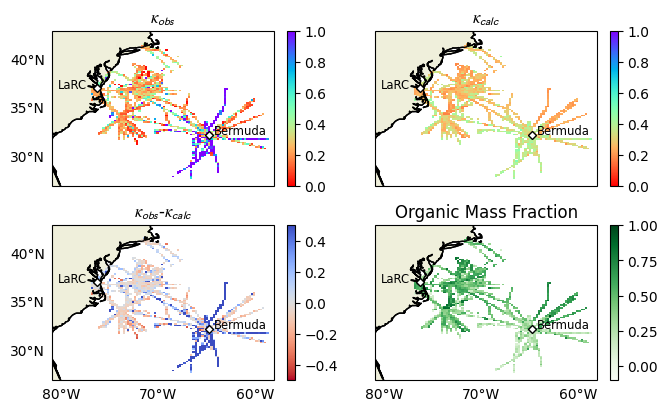

In [15]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''



# Set up the map projection and plot area
fig, axes = plt.subplots(2,2, figsize=(6.5,4), subplot_kw={'projection': ccrs.PlateCarree()}, sharex='all', sharey='all', constrained_layout=True)

plt_key = ['k_obs', 'k']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$', r'$\kappa _{\mathsf{calc}}$']

for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[0,i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='rainbow_r', transform=ccrs.PlateCarree(), vmin=0, vmax=1)
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')


plt_key = ['k_diff', 'OMF']
cmap_labels = [r'$\kappa _{\mathsf{obs}}$-$\kappa _{\mathsf{calc}}$', 'Organic Mass Fraction']
vmax_l = [.5, 0]
vmin_l = [-.5, 1]
cmap_l = ['coolwarm_r','Greens']
for i in range(0,2):
    data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]

    
    ax=axes[1,i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap=cmap_l[i], transform=ccrs.PlateCarree(), vmax=vmax_l[i], vmin=vmin_l[i])
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    if i ==0:
        gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees
    else:
        gl.ylocator = mticker.FixedLocator([])

    gl.xlines = False
    gl.ylines = False
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')

# Coordinates for Bermuda and NASA Langley
bermuda_coords = (32.3078, -64.7505)  # Latitude, Longitude of Bermuda
langley_coords = (37.0862, -76.3809)    # Latitude, Longitude of NASA Langley

# Adding the labels to each axis
for ax in axes.flat:
    # Add label for Bermuda
    ax.plot(bermuda_coords[1], bermuda_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(bermuda_coords[1] + 0.5, bermuda_coords[0], 'Bermuda', color='black', transform=ccrs.PlateCarree(), fontsize='small')

    # Add label for NASA Langley
    ax.plot(langley_coords[1], langley_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
    ax.text(langley_coords[1] + -4, langley_coords[0], 'LaRC', color='black', transform=ccrs.PlateCarree(), fontsize='small')


# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')
#plt.tight_layout()
# Show the plot
plt.savefig('../figures/k_obs_map_omf.png', dpi=1000)

In [16]:
d.OMF.describe()

count    13670.000000
mean         0.480155
std          0.208899
min          0.000000
25%          0.317596
50%          0.485067
75%          0.641494
max          0.996748
Name: OMF, dtype: float64

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/1315185373.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1606/1315185373.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)


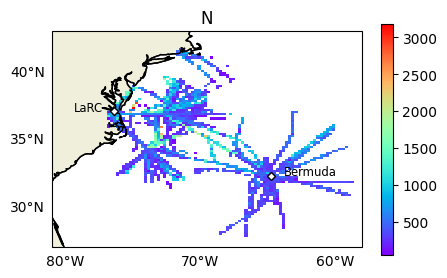

In [17]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''




# Set up the map projection and plot area
fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

plt_key = ['N_CCN_stdPT', 'k', 'CO_ppm']
cmap_labels = ['N', r'$\kappa _{calc}$', 'CO [ppm]']

i=0
data = d.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

# Define the grid resolution
lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

# Bin the data into the grid
data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

# Calculate the mean time for each grid cell
grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
#grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

# Create a 2D array of the grid
time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


#ax=axes[i]
ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, edgecolor='black')
#ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

# Plot the heatmap
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='rainbow', transform=ccrs.PlateCarree())
ax.set_title(cmap_labels[i])
# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
#cbar.set_label(cmap_labels[i])

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

gl.xlines = False
gl.ylines = False


ax.plot(bermuda_coords[1], bermuda_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
ax.text(bermuda_coords[1] + 1, bermuda_coords[0], 'Bermuda', color='black', transform=ccrs.PlateCarree(), fontsize='small')

# Add label for NASA Langley
ax.plot(langley_coords[1], langley_coords[0], marker='D', color='white', markersize=4, transform=ccrs.PlateCarree(), markeredgewidth=1, markeredgecolor='black')
ax.text(langley_coords[1] + -3, langley_coords[0], 'LaRC', color='black', transform=ccrs.PlateCarree(), fontsize='small')


# Set title
#ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

# Show the plot
plt.savefig('../figures/CCN_n_graph.png', dpi=1000, bbox_inches='tight')